# Web Scraping Flipkart 

# Step 1 : Install / Import the necessary libraries

In [83]:
!pip install requests

In [84]:
!pip install bs4

In [85]:
# import web scrapping libraries

import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

In [86]:
# import data handling and data manipulation libraries 

import pandas as pd
import numpy as np

# Step 2 : Choose the data you need to extract

In [170]:
# scrap the flip kart data

url="https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
page_content=requests.get(url)

# Step 3 : Send HTTP request to the URL of the page you want to scrape

In [171]:
# open the url

page_content.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

Now that we have got the HTML content of the page, we need to parse the data and store it in soup variable to structure it into a different format which will help in data extraction.

In [172]:
page_soup=soup(page_content.content,'html.parser')
page_soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [174]:
# fetch only the product

container=page_soup.find_all("div",{"class":"_2kHMtA"})

We can print the content of the page.It will give the HTML content of the page and it’s in string format.

In [175]:
# it will show the entire page

container

[<div class="_2kHMtA"><a class="_1fQZEK" href="/redmi-10-caribbean-green-64-gb/p/itmbfb8dfcdd6e10?pid=MOBGC9GYQGGKWEU3&amp;lid=LSTMOBGC9GYQGGKWEU3SLBNSD&amp;marketplace=FLIPKART&amp;q=phone&amp;store=tyy%2F4io&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=168a853d-c63d-4b60-898b-36b2547763d0.MOBGC9GYQGGKWEU3.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=5ziqedz6mo0000001678288081119&amp;qH=f7a42fe7211f98ac" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="REDMI 10 (Caribbean Green, 64 GB)" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/mobile/g/p/x/-original-imagk4nz54s7a7rf.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH1S" readonly="" type="checkbox"/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to 

In [176]:
name = []
price = []
mrp = []
rating = []
star = []
offer = []

for co in container:
    name.append(co.find('div',class_="_4rR01T").text.strip())
    price.append(co.find('div',class_ = '_30jeq3 _1_WHN1').text.strip())
    mrp.append(co.find('div',class_ = '_3I9_wc _27UcVY').text.strip())
    rating.append(co.find('div',class_ = 'gUuXy-').text.strip())
    star.append(co.find('div',class_ = '_3LWZlK').text.strip())
    offer.append(co.find('div',class_ = '_3Ay6Sb').text.strip())

In [177]:
# fetch only one product
# make as complete html & css format,so we can use 'con' variable

con=container[0]
print(soup.prettify(con))

<div class="_2kHMtA">
 <a class="_1fQZEK" href="/redmi-10-caribbean-green-64-gb/p/itmbfb8dfcdd6e10?pid=MOBGC9GYQGGKWEU3&amp;lid=LSTMOBGC9GYQGGKWEU3SLBNSD&amp;marketplace=FLIPKART&amp;q=phone&amp;store=tyy%2F4io&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=168a853d-c63d-4b60-898b-36b2547763d0.MOBGC9GYQGGKWEU3.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=5ziqedz6mo0000001678288081119&amp;qH=f7a42fe7211f98ac" rel="noopener noreferrer" target="_blank">
  <div class="MIXNux">
   <div class="_2QcLo-">
    <div>
     <div class="CXW8mj" style="height:200px;width:200px">
      <img alt="REDMI 10 (Caribbean Green, 64 GB)" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/mobile/g/p/x/-original-imagk4nz54s7a7rf.jpeg?q=70"/>
     </div>
    </div>
   </div>
   <div class="_3wLduG">
    <div class="_3PzNI-">
     <span class="f3A4_V">
      <label class="_2iDkf8">
       <input class="_30VH1S" readonly="" type="checkbox"/>
      

# Step 4 : Inspect the page and write codes for extraction

# Product Name

In [178]:
for co in container:
    pro_name=co.findAll("div",{"class":"_4rR01T"})
    print(pro_name[0].text)

REDMI 10 (Caribbean Green, 64 GB)
REDMI 10 (Pacific Blue, 64 GB)
Infinix HOT 20 Play (Fantasy Purple, 64 GB)
GFive U220+
Infinix HOT 20 Play (Racing Black, 64 GB)
Infinix HOT 20 Play (Luna Blue, 64 GB)
REDMI 10 (Shadow Black, 64 GB)
GFive U220i
REDMI 10 (Midnight Black, 64 GB)
Infinix HOT 20 Play (Aurora Green, 64 GB)
SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)
GFive U873
SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)
POCO C50 (Country Green, 32 GB)
POCO C50 (Royal Blue, 32 GB)
MOTOROLA e40 (Carbon Gray, 64 GB)
SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)
REDMI 10 (Sunrise Orange, 64 GB)
MOTOROLA g52 (Charcoal Grey, 64 GB)
MOTOROLA g31 (Baby Blue, 128 GB)
MOTOROLA g52 (Metallic White, 128 GB)
MOTOROLA g52 (Charcoal Grey, 128 GB)
Infinix Hot 12 (Exploratory Blue, 64 GB)
Infinix Hot 12 (7° Purple, 64 GB)


# Sale Price

In [179]:
for co in container:
    s_price=co.findAll("div",{"class":"_30jeq3 _1_WHN1"})
    print(s_price[0].text)

₹9,299
₹9,299
₹8,199
₹769
₹8,199
₹8,199
₹9,299
₹769
₹9,299
₹8,199
₹14,999
₹735
₹14,999
₹5,749
₹5,749
₹8,499
₹14,999
₹9,299
₹10,999
₹10,999
₹12,999
₹12,999
₹8,499
₹8,499


# Actual Price

In [180]:
for co in container:
    act_price=co.findAll("div",{"class":"_3I9_wc _27UcVY"})
    print(act_price[0].text)

₹14,999
₹14,999
₹11,999
₹799
₹11,999
₹11,999
₹14,999
₹1,099
₹14,999
₹11,999
₹23,999
₹1,099
₹23,999
₹8,999
₹8,999
₹10,999
₹23,999
₹14,999
₹17,999
₹16,999
₹19,999
₹19,999
₹12,999
₹12,999


# Ratting

In [181]:
for co in container:
    rating=co.findAll("div",{"class":"_3LWZlK"})
    print(rating[0].text)

4.3
4.3
4.4
3.5
4.4
4.4
4.3
3.6
4.3
4.4
4.3
3.6
4.3
4.4
4.4
4.2
4.3
4.3
4.2
4.1
4.2
4.2
4.3
4.3


# No of Reviews & Ratting

In [182]:
for co in container:
    review=co.findAll("span",{"class":"_2_R_DZ"})
    print(review[0].text)

1,92,505 Ratings & 12,418 Reviews
1,92,505 Ratings & 12,418 Reviews
10,162 Ratings & 599 Reviews
5,014 Ratings & 549 Reviews
10,162 Ratings & 599 Reviews
10,162 Ratings & 599 Reviews
1,92,505 Ratings & 12,418 Reviews
330 Ratings & 24 Reviews
1,92,505 Ratings & 12,418 Reviews
10,162 Ratings & 599 Reviews
1,61,874 Ratings & 12,904 Reviews
8,956 Ratings & 772 Reviews
1,61,874 Ratings & 12,904 Reviews
2,953 Ratings & 143 Reviews
2,953 Ratings & 143 Reviews
72,441 Ratings & 6,819 Reviews
1,61,874 Ratings & 12,904 Reviews
1,92,505 Ratings & 12,418 Reviews
10,969 Ratings & 1,312 Reviews
13,759 Ratings & 1,425 Reviews
28,950 Ratings & 3,389 Reviews
28,950 Ratings & 3,389 Reviews
19,681 Ratings & 1,397 Reviews
19,681 Ratings & 1,397 Reviews


# Data Visualization and EDA

In [184]:
name = []
price = []
mrp = []
rating = []
star = []
offer = []

for co in container:
    name.append(co.find('div',class_="_4rR01T").text.strip())
    price.append(co.find('div',class_ = '_30jeq3 _1_WHN1').text.strip())
    mrp.append(co.find('div',class_ = '_3I9_wc _27UcVY').text.strip())
    rating.append(co.find('div',class_ = 'gUuXy-').text.strip())
    star.append(co.find('div',class_ = '_3LWZlK').text.strip())
    offer.append(co.find('div',class_ = '_3Ay6Sb').text.strip())

# Import Libraries

In [194]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Loading the Dataset

In [261]:
# Store the data in a pandas dataframe

fk_df = pd.DataFrame({'Product_Name':name, 'Sale Price':price, "Actual price":mrp,"Rating&Review":rating,"Star": star,"Offer":offer})
fk_df[0:10]

,Product_Name,Sale Price,Actual price,Rating&Review,Star,Offer
0,"REDMI 10 (Caribbean Green, 64 GB)","₹9,299","₹14,999","4.31,92,505 Ratings & 12,418 Reviews",4.3,38% off
1,"REDMI 10 (Pacific Blue, 64 GB)","₹9,299","₹14,999","4.31,92,505 Ratings & 12,418 Reviews",4.3,38% off
2,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)","₹8,199","₹11,999","4.410,162 Ratings & 599 Reviews",4.4,31% off
3,GFive U220+,₹769,₹799,"3.55,014 Ratings & 549 Reviews",3.5,3% off
4,"Infinix HOT 20 Play (Racing Black, 64 GB)","₹8,199","₹11,999","4.410,162 Ratings & 599 Reviews",4.4,31% off
5,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199","₹11,999","4.410,162 Ratings & 599 Reviews",4.4,31% off
6,"REDMI 10 (Shadow Black, 64 GB)","₹9,299","₹14,999","4.31,92,505 Ratings & 12,418 Reviews",4.3,38% off
7,GFive U220i,₹769,"₹1,099",3.6330 Ratings & 24 Reviews,3.6,30% off
8,"REDMI 10 (Midnight Black, 64 GB)","₹9,299","₹14,999","4.31,92,505 Ratings & 12,418 Reviews",4.3,38% off
9,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199","₹11,999","4.410,162 Ratings & 599 Reviews",4.4,31% off


In [262]:
# find the no of columns

fk_df.columns

Index(['Product_Name', 'Sale Price', 'Actual price', 'Rating&Review', 'Star',
       'Offer'],
      dtype='object')

# Step 2 : Data Profilling and Cleaning

In [263]:
fk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_Name   24 non-null     object
 1   Sale Price     24 non-null     object
 2   Actual price   24 non-null     object
 3   Rating&Review  24 non-null     object
 4   Star           24 non-null     object
 5   Offer          24 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB


# Handling null values

In [264]:
print("\nColumns with missing value\n") 
print(fk_df.isnull().any())


Columns with missing value

Product_Name     False
Sale Price       False
Actual price     False
Rating&Review    False
Star             False
Offer            False
dtype: bool


# Step 3 : EDA and Visualization

In [279]:
# prints the high sales price phones

high_sp = fk_df[['Product_Name','Sale Price']].sort_values("Sale Price",ascending = False).head(10)
high_sp

,Product_Name,Sale Price
0,"REDMI 10 (Caribbean Green, 64 GB)","₹9,299"
8,"REDMI 10 (Midnight Black, 64 GB)","₹9,299"
17,"REDMI 10 (Sunrise Orange, 64 GB)","₹9,299"
1,"REDMI 10 (Pacific Blue, 64 GB)","₹9,299"
6,"REDMI 10 (Shadow Black, 64 GB)","₹9,299"
22,"Infinix Hot 12 (Exploratory Blue, 64 GB)","₹8,499"
15,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹8,499"
23,"Infinix Hot 12 (7° Purple, 64 GB)","₹8,499"
9,"Infinix HOT 20 Play (Aurora Green, 64 GB)","₹8,199"
5,"Infinix HOT 20 Play (Luna Blue, 64 GB)","₹8,199"


<AxesSubplot:xlabel='Sale Price', ylabel='Product_Name'>

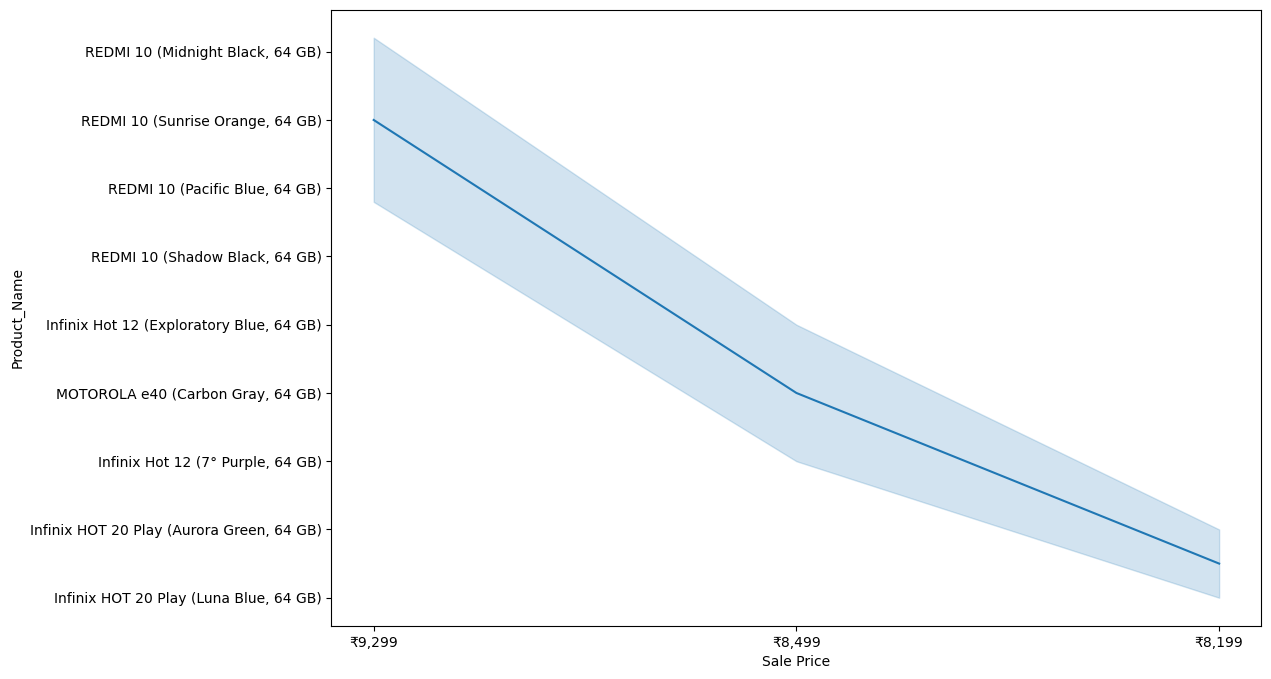

In [280]:
# plot a lineplot for the above information

plt.figure(figsize=(12,8))
sns.lineplot(x='Sale Price',y='Product_Name',data=high_sp)

In [281]:
# prints the high actual price phones

high_ap=fk_df[['Product_Name','Actual price']].sort_values("Actual price",ascending = False).head(10)
high_ap

,Product_Name,Actual price
14,"POCO C50 (Royal Blue, 32 GB)","₹8,999"
13,"POCO C50 (Country Green, 32 GB)","₹8,999"
3,GFive U220+,₹799
12,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)","₹23,999"
16,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)","₹23,999"
10,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)","₹23,999"
21,"MOTOROLA g52 (Charcoal Grey, 128 GB)","₹19,999"
20,"MOTOROLA g52 (Metallic White, 128 GB)","₹19,999"
18,"MOTOROLA g52 (Charcoal Grey, 64 GB)","₹17,999"
19,"MOTOROLA g31 (Baby Blue, 128 GB)","₹16,999"


<AxesSubplot:xlabel='Actual price', ylabel='Product_Name'>

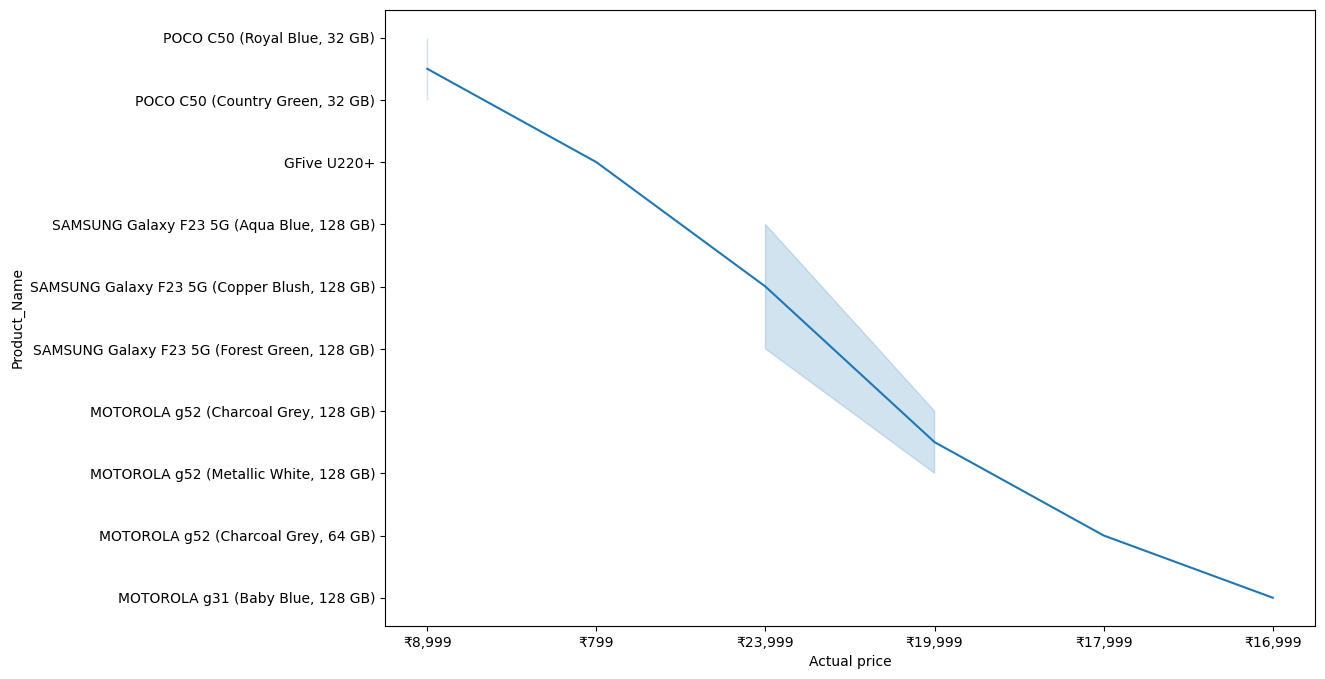

In [282]:
# plot a lineplot for the above information

plt.figure(figsize=(12,8))
sns.lineplot(x='Actual price',y='Product_Name',data=high_ap)

In [283]:
# top 10 smartphones 

fk_df.Product_Name.value_counts().head(10)

REDMI 10 (Caribbean Green, 64 GB)               1
REDMI 10 (Pacific Blue, 64 GB)                  1
Infinix Hot 12 (Exploratory Blue, 64 GB)        1
MOTOROLA g52 (Charcoal Grey, 128 GB)            1
MOTOROLA g52 (Metallic White, 128 GB)           1
MOTOROLA g31 (Baby Blue, 128 GB)                1
MOTOROLA g52 (Charcoal Grey, 64 GB)             1
REDMI 10 (Sunrise Orange, 64 GB)                1
SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)    1
MOTOROLA e40 (Carbon Gray, 64 GB)               1
Name: Product_Name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Product_Name'>

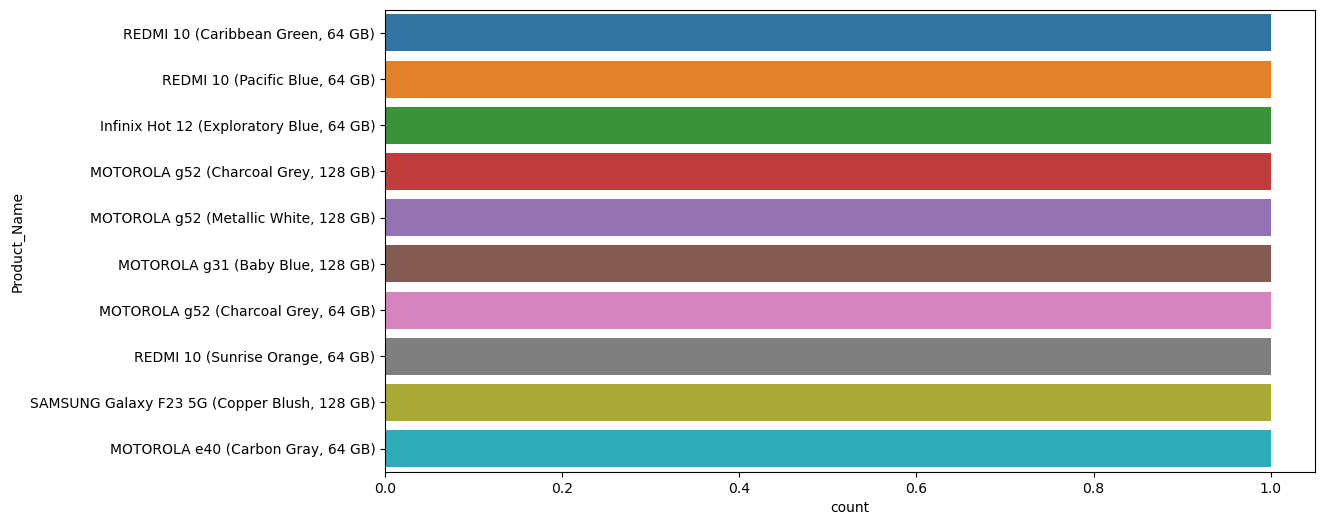

In [284]:
# plot the above info

plt.figure(figsize=(12,6))
sns.countplot(y="Product_Name",order=fk_df["Product_Name"].value_counts().index[0:10],data=fk_df)

In [285]:
# prints the highest offer mobile phones

high_offer = fk_df[['Product_Name','Offer']].sort_values("Offer",ascending = False).head(10)
high_offer

,Product_Name,Offer
0,"REDMI 10 (Caribbean Green, 64 GB)",38% off
8,"REDMI 10 (Midnight Black, 64 GB)",38% off
18,"MOTOROLA g52 (Charcoal Grey, 64 GB)",38% off
17,"REDMI 10 (Sunrise Orange, 64 GB)",38% off
1,"REDMI 10 (Pacific Blue, 64 GB)",38% off
6,"REDMI 10 (Shadow Black, 64 GB)",38% off
16,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",37% off
10,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",37% off
12,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",37% off
13,"POCO C50 (Country Green, 32 GB)",36% off


In [287]:
high_RR = fk_df[['Product_Name','Rating&Review']].sort_values("Rating&Review",ascending =True).head(10)
high_RR

,Product_Name,Rating&Review
3,GFive U220+,"3.55,014 Ratings & 549 Reviews"
7,GFive U220i,3.6330 Ratings & 24 Reviews
11,GFive U873,"3.68,956 Ratings & 772 Reviews"
19,"MOTOROLA g31 (Baby Blue, 128 GB)","4.113,759 Ratings & 1,425 Reviews"
18,"MOTOROLA g52 (Charcoal Grey, 64 GB)","4.210,969 Ratings & 1,312 Reviews"
21,"MOTOROLA g52 (Charcoal Grey, 128 GB)","4.228,950 Ratings & 3,389 Reviews"
20,"MOTOROLA g52 (Metallic White, 128 GB)","4.228,950 Ratings & 3,389 Reviews"
15,"MOTOROLA e40 (Carbon Gray, 64 GB)","4.272,441 Ratings & 6,819 Reviews"
16,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)","4.31,61,874 Ratings & 12,904 Reviews"
10,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)","4.31,61,874 Ratings & 12,904 Reviews"


# Inferences and Conclusion

If comparing the first 10 smart phones 
1. There is a discount of 30% and above for all the smartphones.
2. REDMI 10 (Caribbean Green, 64 GB) has highest sales price and Infinix HOT 20 Play (Luna Blue, 64 GB) has the lowest sales price.
3. SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB) has the highest actual price and GFive U220+ has the lowest actual price.
4. SAMSUNG Galaxy F23 5G (Forest Green, 128 GB),SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB) are the most reviewd and rating smart phone.

# References

1. Flipkart Dataset
2. Tutorials point(pandas,seaborn,matplotlib)
3. W3school(pandas,seaborn,matplotlib)
4. Google for EDA
5. Youtube for EDA